# Data Preparation & Transformation

## Required Libraries

In [1]:
#Importing libraries required for the description of the dataset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import mutual_info_classif
from sklearn.utils import resample
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from matplotlib import pyplot
import time
from sklearn.metrics import classification_report
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import matthews_corrcoef
from sklearn.model_selection import GridSearchCV



## Data Description

In [2]:
#Reading the dataset
data_predict_model = pd.read_csv('/Users/eric_na/Desktop/Ryerson/CIND820/Dataset/caravan-insurance-challenge.csv')

In [3]:
#Dropping Orgin Column
data_predict_model = data_predict_model.drop('ORIGIN', axis=1)

In [4]:
#Getting the first five rows
data_predict_model.head()

,MOSTYPE,MAANTHUI,MGEMOMV,MGEMLEEF,MOSHOOFD,MGODRK,MGODPR,MGODOV,MGODGE,MRELGE,...,APERSONG,AGEZONG,AWAOREG,ABRAND,AZEILPL,APLEZIER,AFIETS,AINBOED,ABYSTAND,CARAVAN
0,33,1,3,2,8,0,5,1,3,7,...,0,0,0,1,0,0,0,0,0,0
1,37,1,2,2,8,1,4,1,4,6,...,0,0,0,1,0,0,0,0,0,0
2,37,1,2,2,8,0,4,2,4,3,...,0,0,0,1,0,0,0,0,0,0
3,9,1,3,3,3,2,3,2,4,5,...,0,0,0,1,0,0,0,0,0,0
4,40,1,4,2,10,1,4,1,4,7,...,0,0,0,1,0,0,0,0,0,0


In [5]:
#Checking any missing values
data_predict_model.isnull().sum()

MOSTYPE     0
MAANTHUI    0
MGEMOMV     0
MGEMLEEF    0
MOSHOOFD    0
           ..
APLEZIER    0
AFIETS      0
AINBOED     0
ABYSTAND    0
CARAVAN     0
Length: 86, dtype: int64

In [6]:
#Providing descriptive statistics of the working datase
data_predict_model.describe()

,MOSTYPE,MAANTHUI,MGEMOMV,MGEMLEEF,MOSHOOFD,MGODRK,MGODPR,MGODOV,MGODGE,MRELGE,...,APERSONG,AGEZONG,AWAOREG,ABRAND,AZEILPL,APLEZIER,AFIETS,AINBOED,ABYSTAND,CARAVAN
count,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,...,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,9822.00000,9822.000000,9822.000000,9822.000000
mean,24.253207,1.108735,2.677561,2.996437,5.779067,0.700672,4.637650,1.050092,3.262981,6.188964,...,0.004582,0.007941,0.004276,0.574018,0.000916,0.005091,0.03146,0.008450,0.013846,0.059662
std,12.918058,0.412101,0.780701,0.804660,2.874148,1.015107,1.721212,1.011156,1.606287,1.896070,...,0.067535,0.088764,0.071224,0.561255,0.030258,0.077996,0.20907,0.092647,0.117728,0.236872
min,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,10.000000,1.000000,2.000000,2.000000,3.000000,0.000000,4.000000,0.000000,2.000000,5.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
50%,30.000000,1.000000,3.000000,3.000000,7.000000,0.000000,5.000000,1.000000,3.000000,6.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
75%,35.000000,1.000000,3.000000,3.000000,8.000000,1.000000,6.000000,2.000000,4.000000,7.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
max,41.000000,10.000000,6.000000,6.000000,10.000000,9.000000,9.000000,5.000000,9.000000,9.000000,...,1.000000,1.000000,2.000000,7.000000,1.000000,2.000000,4.00000,2.000000,2.000000,1.000000


In [7]:
#Number of Records
len(data_predict_model)

9822

In [8]:
#Number of Attributes
len(data_predict_model.columns)

86

In [9]:
#Split the dataset into predictor variables and target variable
X = data_predict_model.iloc[:,:85]
Y = data_predict_model.iloc[:,-1]

In [10]:
#Split the dataset into training and test dataset
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=15)
#Concatenating X_train and Y_train as a train set
Train_set = pd.concat([X_train,Y_train],axis=1)

## Class Imbalance - Upsample Minority Class

In [11]:
#Class Balance
Train_set['CARAVAN'].value_counts()

0    7399
1     458
Name: CARAVAN, dtype: int64

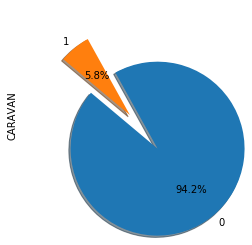

In [12]:
Train_set['CARAVAN'].value_counts().plot.pie(autopct='%1.1f%%', shadow=True, startangle=140,explode=(0.5, 0))

In [13]:
# Separating majority and minority classes
majority_class = Train_set[Train_set.CARAVAN==0]
minority_class = Train_set[Train_set.CARAVAN==1]

# Upsampling minority class to have a 1:1 ratio
minority_class_upsampled = resample(minority_class,replace=True,n_samples=int(Train_set['CARAVAN'].value_counts()[0]),random_state=10)

# Concatinating upsampled data to the original dataset
Train_set = pd.concat([majority_class, minority_class_upsampled])

#Class Balance after Upsampling Minority Class
Train_set['CARAVAN'].value_counts()

1    7399
0    7399
Name: CARAVAN, dtype: int64

## Dimensionality Reduction Algorithms

### Step 1. High Correlation Filter: Removing columns with very similar trends

In [14]:
#Applying Spearman's rank correlation to obtain correlation between ordinal attributes
corr = Train_set.corr(method='spearman')
corr.style.background_gradient(cmap='bwr')

In [15]:
#Listing columns that have high correlations between them, with the threshold of 0.8
high_corr = []

for column1 in Train_set.columns:
    for column2 in Train_set.columns:
        if column1 != column2 and column2 not in high_corr and abs(corr[column1][column2]) > 0.8:
            high_corr.append(column1)
print(high_corr)

['MOSTYPE', 'MRELGE', 'MHHUUR', 'MZFONDS', 'PWAPART', 'PWABEDR', 'PWALAND', 'PPERSAUT', 'PBESAUT', 'PMOTSCO', 'PVRAAUT', 'PAANHANG', 'PTRACTOR', 'PWERKT', 'PBROM', 'PLEVEN', 'PPERSONG', 'PGEZONG', 'PWAOREG', 'PBRAND', 'PZEILPL', 'PPLEZIER', 'PFIETS', 'PINBOED', 'PBYSTAND']


In [16]:
#Applying High Correlation Filter
Train_set = Train_set.drop(high_corr,axis=1)

### Step 2. Performing Feature Selection Methods for Categorical Data

### Wrapper Method
#### Recursive Feature Elimination

>5 0.856 (0.004)
>6 0.917 (0.004)
>7 0.923 (0.004)
>8 0.924 (0.004)
>9 0.926 (0.005)
>10 0.928 (0.003)
>11 0.929 (0.008)
>12 0.942 (0.013)
>13 0.945 (0.013)
>14 0.953 (0.003)
>15 0.953 (0.003)
>16 0.954 (0.005)
>17 0.962 (0.005)
>18 0.962 (0.004)
>19 0.963 (0.003)
>20 0.963 (0.003)
>21 0.964 (0.002)
>22 0.963 (0.002)
>23 0.963 (0.003)
>24 0.963 (0.002)
>25 0.962 (0.003)


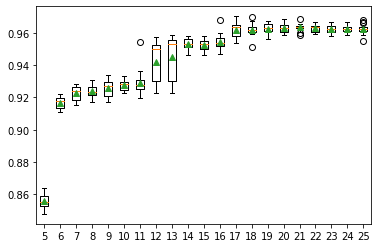

In [17]:
# explore the number of selected features for RFE
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from matplotlib import pyplot

# get a list of models to evaluate
def get_models():
	models = dict()
	for i in range(5, 26):
		rfe = RFE(estimator=RandomForestClassifier(), n_features_to_select=i)
		model = RandomForestClassifier()
		models[str(i)] = Pipeline(steps=[('s',rfe),('m',model)])
	return models

# evaluate a give model using cross-validation
def evaluate_model(model, X, y):
	cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
	scores = cross_val_score(model, X, y, scoring='f1', cv=cv, n_jobs=-1, error_score='raise')
	return scores

# define dataset
X = Train_set.drop('CARAVAN',axis=1)
Y = Train_set['CARAVAN']
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	scores = evaluate_model(model, X, Y)
	results.append(scores)
	names.append(name)
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

>lr 0.693 (0.008)
>cart 0.951 (0.003)
>rf 0.963 (0.003)
>nb 0.340 (0.014)


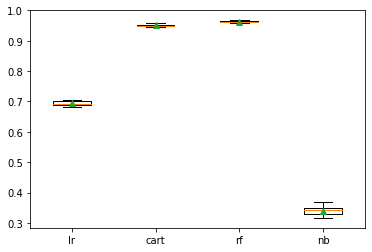

In [18]:
# Loading the data that the wrapper method is applied to
X = Train_set.drop('CARAVAN',axis=1)
Y = Train_set['CARAVAN']

# get a list of models to evaluate
def get_models():
    models = dict()
    # Logistic Regression
    rfe = RFE(estimator=LogisticRegression(), n_features_to_select=19)
    model = LogisticRegression()
    models['lr'] = Pipeline(steps=[('s',rfe),('m',model)])
    # Classification and Regression Tree
    rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=19)
    model = DecisionTreeClassifier()
    models['cart'] = Pipeline(steps=[('s',rfe),('m',model)])
    # Random Forest Classifier
    rfe = RFE(estimator=RandomForestClassifier(), n_features_to_select=19)
    model = RandomForestClassifier()
    models['rf'] = Pipeline(steps=[('s',rfe),('m',model)])
    # Naive Bayes
    rfe = RFE(estimator=BernoulliNB(), n_features_to_select=19)
    model = BernoulliNB()
    models['nb'] = Pipeline(steps=[('s',rfe),('m',model)])
    return models
    
# evaluate a give model using cross-validation based on f-score
def evaluate_model(model, X, y):
    cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
    scores = cross_val_score(model, X, y, scoring='f1', cv=cv, n_jobs=-1)
    return scores

# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model(model, X, Y)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()


In [19]:
# define RFE based on the random forest classifier model
rfe = RFE(RandomForestClassifier(), n_features_to_select=19)
# fit RFE
rfe.fit(X, Y)
# summarize all features
rfe_features =[]
for i in range(X.shape[1]):
    if rfe.support_[i] == True:
        print('Column: %d' % (i ))
        rfe_features.append(i)
        

/Users/eric_na/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/eric_na/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/eric_na/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/eric_na/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/eric_na/opt/a

/Users/eric_na/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/eric_na/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/eric_na/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/eric_na/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/eric_na/opt/a

Column: 3
Column: 5
Column: 7
Column: 11
Column: 12
Column: 14
Column: 15
Column: 19
Column: 20
Column: 25
Column: 27
Column: 28
Column: 32
Column: 33
Column: 37
Column: 38
Column: 39
Column: 42
Column: 54


/Users/eric_na/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/eric_na/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


### Selecting variables based on Recursive Feature Elimination

In [20]:
#Selecting Predictor Variables
X = Train_set.iloc[:,rfe_features]
#Selecting Target Variables
Y = Train_set.iloc[:,-1]

# Predictive Modelling - Classification Models

## 1. Model Training & Validation

### a) Logistic Regression

In [21]:
#Logistic Regression Model Validation with different sets of hyperparameters to compare f-score

# define models and parameters
model = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]
# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='f1',error_score=0)
grid_result = grid_search.fit(X, Y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.662564 using {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
0.661593 (0.009361) with: {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.660967 (0.009176) with: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
0.661446 (0.009263) with: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
0.661593 (0.009361) with: {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
0.661176 (0.009283) with: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
0.661034 (0.009506) with: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
0.661622 (0.009323) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'newton-cg'}
0.661256 (0.009463) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'lbfgs'}
0.660923 (0.009211) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}
0.660628 (0.009263) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}
0.660820 (0.009328) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
0.662564 (0.009583) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
0.659474 (0.009978) wit

In [22]:
# Logistic Regression Model Training with the best performing set of hyperparameters
LR=LogisticRegression(C=grid_result.best_params_['C'], solver=grid_result.best_params_['solver'])
LR.fit(X,Y)

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

### b) Classification and Regression Trees

In [23]:
# Classification and Regression Trees Model Validation with different sets of hyperparameters to compare f-score

# define models and parameters
model = DecisionTreeClassifier()
max_features = ['auto','sqrt','log2',None]
criterion= ['gini','entropy']
# define grid search
grid = dict(max_features=max_features,criterion=criterion)
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='f1',error_score=0)
grid_result = grid_search.fit(X, Y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.953166 using {'criterion': 'gini', 'max_features': 'log2'}
0.951093 (0.004211) with: {'criterion': 'gini', 'max_features': 'auto'}
0.951607 (0.002221) with: {'criterion': 'gini', 'max_features': 'sqrt'}
0.953166 (0.002886) with: {'criterion': 'gini', 'max_features': 'log2'}
0.951162 (0.002868) with: {'criterion': 'gini', 'max_features': None}
0.951004 (0.003620) with: {'criterion': 'entropy', 'max_features': 'auto'}
0.951263 (0.002751) with: {'criterion': 'entropy', 'max_features': 'sqrt'}
0.951774 (0.002261) with: {'criterion': 'entropy', 'max_features': 'log2'}
0.951265 (0.002915) with: {'criterion': 'entropy', 'max_features': None}


In [24]:
# Classification and Regression Trees Model Training with the best performing set of hyperparameters
CART=DecisionTreeClassifier(criterion=grid_result.best_params_['criterion'],max_features=grid_result.best_params_['max_features'])
CART.fit(X,Y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features='log2', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

### c) Random Forest Classifier

In [25]:
#Random Forest Classifier Model Validation with different sets of hyperparameters to compare f-score

# define models and parameters
model = RandomForestClassifier()
n_estimators = [10, 100, 1000]
max_features = ['sqrt', 'log2']
# define grid search
grid = dict(n_estimators=n_estimators,max_features=max_features)
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='f1',error_score=0)
grid_result = grid_search.fit(X, Y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.964311 using {'max_features': 'log2', 'n_estimators': 100}
0.963071 (0.002234) with: {'max_features': 'sqrt', 'n_estimators': 10}
0.964198 (0.002310) with: {'max_features': 'sqrt', 'n_estimators': 100}
0.964283 (0.002423) with: {'max_features': 'sqrt', 'n_estimators': 1000}
0.963506 (0.002282) with: {'max_features': 'log2', 'n_estimators': 10}
0.964311 (0.002435) with: {'max_features': 'log2', 'n_estimators': 100}
0.964221 (0.002381) with: {'max_features': 'log2', 'n_estimators': 1000}


In [26]:
# Random Forest Classifier(RFC) Model Training with the best performing set of hyperparameters
RFC=RandomForestClassifier(max_features=grid_result.best_params_['max_features'],n_estimators=grid_result.best_params_['n_estimators'])
RFC.fit(X,Y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='log2', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

### d) Naive Bayes Classifier

In [27]:
#Naive Bayes Classifer Model Validation with different sets of hyperparameters to compare f-score

# define models and parameters
model = BernoulliNB()
alpha = [0.0,0.5,1.0,1.5,2.0,2.5,3.0,3.5,4.0]
binarize = [0.0,0.25,0.5,0.75,1.0]
# define grid search
grid = dict(alpha=alpha, binarize=binarize)
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='f1',error_score=0)
grid_result = grid_search.fit(X, Y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.644953 using {'alpha': 0.0, 'binarize': 0.0}
0.644953 (0.009322) with: {'alpha': 0.0, 'binarize': 0.0}
0.644953 (0.009322) with: {'alpha': 0.0, 'binarize': 0.25}
0.644953 (0.009322) with: {'alpha': 0.0, 'binarize': 0.5}
0.644953 (0.009322) with: {'alpha': 0.0, 'binarize': 0.75}
0.587239 (0.009395) with: {'alpha': 0.0, 'binarize': 1.0}
0.644923 (0.009369) with: {'alpha': 0.5, 'binarize': 0.0}
0.644923 (0.009369) with: {'alpha': 0.5, 'binarize': 0.25}
0.644923 (0.009369) with: {'alpha': 0.5, 'binarize': 0.5}
0.644923 (0.009369) with: {'alpha': 0.5, 'binarize': 0.75}
0.587342 (0.009357) with: {'alpha': 0.5, 'binarize': 1.0}
0.644923 (0.009357) with: {'alpha': 1.0, 'binarize': 0.0}
0.644923 (0.009357) with: {'alpha': 1.0, 'binarize': 0.25}
0.644923 (0.009357) with: {'alpha': 1.0, 'binarize': 0.5}
0.644923 (0.009357) with: {'alpha': 1.0, 'binarize': 0.75}
0.587342 (0.009357) with: {'alpha': 1.0, 'binarize': 1.0}
0.644923 (0.009357) with: {'alpha': 1.5, 'binarize': 0.0}
0.644923 (0.0

/Users/eric_na/opt/anaconda3/lib/python3.7/site-packages/sklearn/naive_bayes.py:485: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)


In [28]:
# Naive Bayes Classifier(NBC) Model Training with the best performing set of hyperparameters
NBC=BernoulliNB(alpha=grid_result.best_params_['alpha'],binarize=grid_result.best_params_['binarize'])
NBC.fit(X,Y)

/Users/eric_na/opt/anaconda3/lib/python3.7/site-packages/sklearn/naive_bayes.py:485: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)


BernoulliNB(alpha=0.0, binarize=0.0, class_prior=None, fit_prior=True)

## 2. Model Testing

### Loading Test Dataset & Dropping Irrelevant Columns

In [29]:
# Number of Records of the test dataset
len(X_test)
len(Y_test)

1965

In [30]:
# Number of predictor variables
len(X_test.columns)

85

In [31]:
#Class Balance
Y_test.value_counts()

0    1837
1     128
Name: CARAVAN, dtype: int64

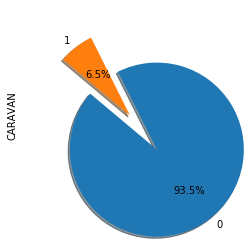

In [32]:
Y_test.value_counts().plot.pie(autopct='%1.1f%%', shadow=True, startangle=140,explode=(0.5, 0))

In [33]:
#### Dropping variables that are not used in the selected model
X_test = X_test.drop(high_corr,axis=1)
X_test = X_test.iloc[:,rfe_features]


### Performing Model Testing with Evaluation Metrics

### a) Logistic Regression

In [34]:
# Confusion Matrix
Y_pred = LR.predict(X_test)
confusion_matrix(Y_test,Y_pred)

array([[1236,  601],
       [  46,   82]])

In [35]:
# Classificaiton Report
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.96      0.67      0.79      1837
           1       0.12      0.64      0.20       128

    accuracy                           0.67      1965
   macro avg       0.54      0.66      0.50      1965
weighted avg       0.91      0.67      0.75      1965



In [36]:
# Recall
recall_score(Y_test, Y_pred)

0.640625

In [37]:
# Precision
precision_score(Y_test,Y_pred)

0.12005856515373353

In [38]:
# F-Score
f1_score(Y_test, Y_pred)

0.20221948212083846

### b) Classification and Regression Trees

In [39]:
# Confusion Matrix
Y_pred = CART.predict(X_test)
confusion_matrix(Y_test,Y_pred)

array([[1683,  154],
       [ 107,   21]])

In [40]:
# Classificaiton Report
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.94      0.92      0.93      1837
           1       0.12      0.16      0.14       128

    accuracy                           0.87      1965
   macro avg       0.53      0.54      0.53      1965
weighted avg       0.89      0.87      0.88      1965



In [41]:
# Recall
recall_score(Y_test, Y_pred)

0.1640625

In [42]:
# Precision
precision_score(Y_test,Y_pred)

0.12

In [43]:
# F-Score
f1_score(Y_test, Y_pred)

0.13861386138613863

### c) Random Forest Classifier

In [44]:
# Confusion Matrix
Y_pred = RFC.predict(X_test)
confusion_matrix(Y_test,Y_pred)

array([[1722,  115],
       [ 109,   19]])

In [45]:
# Classificaiton Report
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94      1837
           1       0.14      0.15      0.15       128

    accuracy                           0.89      1965
   macro avg       0.54      0.54      0.54      1965
weighted avg       0.89      0.89      0.89      1965



In [46]:
# Recall
recall_score(Y_test, Y_pred)

0.1484375

In [47]:
# Precision
precision_score(Y_test,Y_pred)

0.1417910447761194

In [48]:
# F-Score
f1_score(Y_test, Y_pred)

0.14503816793893132

### d) Naive Bayes Classifer

In [49]:
# Confusion Matrix
Y_pred = NBC.predict(X_test)
confusion_matrix(Y_test,Y_pred)

array([[1249,  588],
       [  44,   84]])

In [50]:
# Classificaiton Report
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.97      0.68      0.80      1837
           1       0.12      0.66      0.21       128

    accuracy                           0.68      1965
   macro avg       0.55      0.67      0.50      1965
weighted avg       0.91      0.68      0.76      1965



In [51]:
# Recall
recall_score(Y_test, Y_pred)

0.65625

In [52]:
# Precision
precision_score(Y_test,Y_pred)

0.125

In [53]:
# F-Score
f1_score(Y_test, Y_pred)

0.21